In [5]:
import numpy as np
from matplotlib import pyplot as plt
import sys
import time
from pathlib import Path
from sampling import f_theta_sampler
from agginc_test import agginc
from ost_test import ost
from lsd_test import lsd_test, generate_rbm_p

sys.path.append('wittawatj/fsic_test')
sys.path.append('wittawatj/interpretable_test')
sys.path.append('wittawatj/kernel_gof')
from wittawatj_tests import nfsic, fssd, met, scf
from kgof.density import GaussBernRBM as kgof_GaussBernRBM

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
Path("results").mkdir(exist_ok=True, parents=True)
Path("figures").mkdir(exist_ok=True, parents=True)

sys.path.append('wittawatj/fsic_test')
sys.path.append('wittawatj/interpretable_test')
sys.path.append('wittawatj/kernel_gof')

# MMD

In [29]:
mmdagginc1 = lambda X, Y, seed : agginc("mmd", X, Y, alpha=0.05, R=1, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
mmdagginc100 = lambda X, Y, seed : agginc("mmd", X, Y, alpha=0.05, R=100, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
mmdagginc200 = lambda X, Y, seed : agginc("mmd", X, Y, alpha=0.05, R=200, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
mmdaggincquad = lambda X, Y, seed : agginc("mmd", X, Y, alpha=0.05, R=X.shape[0]-1, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
ost_test = lambda X, Y, seed : ost(seed, X, Y, alpha=0.05, kernel_type="gaussian", l_minus=-3, l_plus=0)

## MMD vary N

In [10]:
%%capture
f_theta_seed = 0
p = 2
s = 1 # useless with our scaling
perturbation_multiplier = 5
d = 1
rep = 100
mult = 2

tests_mmd_vary_n = [met, scf, ost_test, mmdagginc1, mmdagginc100, mmdagginc200, mmdaggincquad]
tests_names_mmd_vary_n = ["met", "scf", "ost_test", "mmdagginc1", "mmdagginc100", "mmdagginc200", "mmdaggincquad"]
tests = tests_mmd_vary_n

N_values = [200, 400, 600, 800, 1000]
outputs_mmd_vary_n = np.zeros((len(tests), len(N_values), rep))
rs = np.random.RandomState(0)
x_axis_mmd_vary_n = N_values
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(N_values)):
        N = N_values[r]
        seed += 1
        perturbation_multiplier = np.exp(d) * p ** s / mult
        X = rs.uniform(0, 1, (N, d)) 
        Y = f_theta_sampler(f_theta_seed, seed, N, p, s, perturbation_multiplier, d)
        for j in range(len(tests)):
            test = tests[j]
            outputs_mmd_vary_n[j][r][i] = test(X, Y, seed)
    print(i + 1, "/", rep, "time:", time.time()-t0)       
np.save("results/mmd_vary_n.npy", outputs_mmd_vary_n)

[[0.38 0.56 0.78 0.89 0.97]
 [0.03 0.14 0.27 0.56 0.68]
 [0.05 0.06 0.08 0.08 0.05]
 [0.07 0.11 0.15 0.19 0.17]
 [0.58 0.86 0.97 1.   1.  ]
 [0.66 0.93 0.99 1.   1.  ]
 [0.66 0.97 1.   1.   1.  ]]


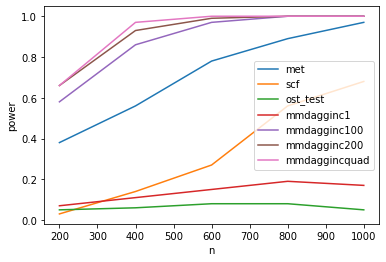

In [143]:
power = np.load("results/mmd_vary_n.npy")
tests_names = tests_names_mmd_vary_n
x_axis = x_axis_mmd_vary_n
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("n")
    plt.ylabel("power")
print(np.mean(power, -1)) 

## MMD vary d

In [17]:
%%capture 
f_theta_seed = 0
p = 1
s = 1 # useless
rep = 100
N = 1000
mult = 1

tests_mmd_vary_d = [met, scf, ost_test, mmdagginc1, mmdagginc100, mmdagginc200, mmdaggincquad]
tests_names_mmd_vary_d = ["met", "scf", "ost_test", "mmdagginc1", "mmdagginc100", "mmdagginc200", "mmdaggincquad"]
tests = tests_mmd_vary_d

d_values = [1, 2, 3, 4]
x_axis_mmd_vary_d = d_values
outputs_mmd_vary_d = np.zeros((len(tests), len(d_values), rep))
rs = np.random.RandomState(0)
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(d_values)):
        d = d_values[r]
        seed += 1
        perturbation_multiplier = np.exp(d) * p ** s / mult 
        X = rs.uniform(0, 1, (N, d))
        Y = f_theta_sampler(f_theta_seed, seed, N, p, s, perturbation_multiplier, d)
        for j in range(len(tests)):
            test = tests[j]
            outputs_mmd_vary_d[j][r][i] = test(X, Y, seed)
    print(i + 1, "/", rep, "time:", time.time() - t0)     
np.save("results/mmd_vary_d.npy", outputs_mmd_vary_d)

[[1.   1.   0.44 0.1 ]
 [0.92 0.99 0.35 0.03]
 [0.97 0.15 0.04 0.03]
 [1.   0.26 0.08 0.05]
 [1.   1.   0.66 0.08]
 [1.   1.   0.85 0.11]
 [1.   1.   0.97 0.22]]


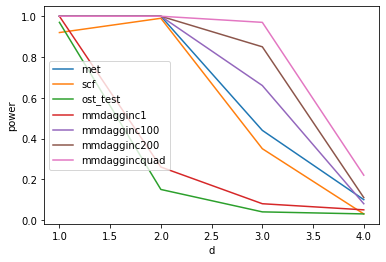

In [144]:
power = np.load("results/mmd_vary_d.npy")
tests_names = tests_names_mmd_vary_d
x_axis = x_axis_mmd_vary_d
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("d")
    plt.ylabel("power")
print(np.mean(power, -1))

## MMD vary mult

In [19]:
%%capture 
f_theta_seed = 0
p = 1
s = 1 # useless
d = 1
N = 1000
rep = 100

tests_mmd_vary_mult = [met, scf, ost_test, mmdagginc1, mmdagginc100, mmdagginc200, mmdaggincquad]
tests_names_mmd_vary_mult = ["met", "scf", "ost_test", "mmdagginc1", "mmdagginc100", "mmdagginc200", "mmdaggincquad"]
tests = tests_mmd_vary_mult

mult_values = [1, 2, 3, 4, 5]
x_axis_mmd_vary_mult = mult_values
outputs_mmd_vary_mult = np.zeros((len(tests), len(mult_values), rep))
rs = np.random.RandomState(0)
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(mult_values)):
        mult = mult_values[r]
        seed += 1
        perturbation_multiplier = np.exp(d) * p ** s / mult
        X = rs.uniform(0, 1, (N, d))
        Y = f_theta_sampler(f_theta_seed, seed, N, p, s, perturbation_multiplier, d)
        for j in range(len(tests)):
            test = tests[j]
            outputs_mmd_vary_mult[j][r][i] = test(X, Y, seed)
    print(i + 1, "/", rep, "time:", time.time() - t0)
print(outputs_mmd_vary_mult)
np.save("results/mmd_vary_mult.npy", outputs_mmd_vary_mult)

[[1.   0.96 0.54 0.26 0.18]
 [0.93 0.71 0.14 0.02 0.01]
 [0.92 0.13 0.06 0.02 0.05]
 [1.   0.32 0.16 0.06 0.02]
 [1.   1.   0.95 0.66 0.48]
 [1.   1.   0.97 0.8  0.58]
 [1.   1.   0.99 0.92 0.73]]


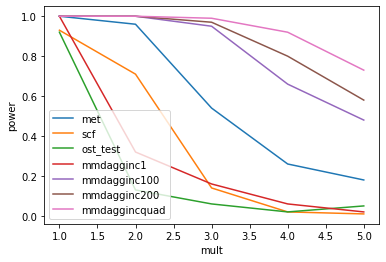

In [145]:
power = np.load("results/mmd_vary_mult.npy")
tests_names = tests_names_mmd_vary_mult
x_axis = x_axis_mmd_vary_mult
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("mult")
    plt.ylabel("power")
print(np.mean(power, -1))

# HSIC

In [24]:
hsicagginc1 = lambda X, Y, seed : agginc("hsic", X, Y, alpha=0.05, R=1, l_minus=-2, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
hsicagginc100 = lambda X, Y, seed : agginc("hsic", X, Y, alpha=0.05, R=100, l_minus=-2, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
hsicagginc200 = lambda X, Y, seed : agginc("hsic", X, Y, alpha=0.05, R=200, l_minus=-2, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
hsicaggincquad = lambda X, Y, seed : agginc("hsic", X, Y, alpha=0.05, R=X.shape[0]-1, l_minus=-2, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)

## HSIC vary N

In [74]:
%%capture
f_theta_seed = 0
p = 2 
s = 1 # useless with our scaling
d = 2 # dx = 1 and dy = 1
rep = 100
mult = 2 

tests_hsic_vary_n = [nfsic, hsicagginc1, hsicagginc100, hsicagginc200, hsicaggincquad]
tests_names_hsic_vary_n = ["nfsic", "hsicagginc1", "hsicagginc100", "hsicagginc200", "hsicaggincquad"]
tests = tests_hsic_vary_n

N_values = [200, 400, 600, 800, 1000]
outputs_hsic_vary_n = np.zeros((len(tests), len(N_values), rep))
rs = np.random.RandomState(0)
x_axis_hsic_vary_n = N_values
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(N_values)):
        N = N_values[r]
        seed += 1
        perturbation_multiplier = np.exp(d) * p ** s / mult
        Z = f_theta_sampler(f_theta_seed, seed, N, p, s, perturbation_multiplier, d)
        X = np.expand_dims(Z[:, 0], 1)
        Y = np.expand_dims(Z[:, 1], 1)
        for j in range(len(tests)):
            test = tests[j]
            outputs_hsic_vary_n[j][r][i] = test(X, Y, seed)
    print(i + 1, "/", rep, "time:", time.time()-t0)       
np.save("results/hsic_vary_n.npy", outputs_hsic_vary_n)

[[0.1  0.17 0.21 0.29 0.43]
 [0.04 0.09 0.09 0.06 0.07]
 [0.1  0.28 0.42 0.49 0.53]
 [0.1  0.3  0.42 0.55 0.66]
 [0.1  0.3  0.46 0.68 0.78]]


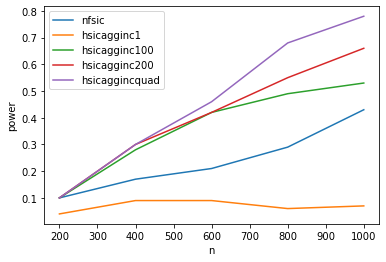

In [146]:
power = np.load("results/hsic_vary_n.npy")
tests_names = tests_names_hsic_vary_n
x_axis = x_axis_hsic_vary_n
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("n")
    plt.ylabel("power")
print(np.mean(power, -1)) 

## HSIC vary d

In [72]:
%%capture 
f_theta_seed = 0
p = 1
s = 1 # useless
rep = 100
N = 1000
mult = 1

tests_hsic_vary_d = [nfsic, hsicagginc1, hsicagginc100, hsicagginc200, hsicaggincquad]
tests_names_hsic_vary_d = ["nfsic", "hsicagginc1", "hsicagginc100", "hsicagginc200", "hsicaggincquad"]
tests = tests_hsic_vary_d

d_values = [1, 2, 3, 4] # this is dx = 1 and dy = 1, 2, 3, 4
x_axis_hsic_vary_d = d_values
outputs_hsic_vary_d = np.zeros((len(tests), len(d_values), rep))
rs = np.random.RandomState(0)
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(d_values)):
        d = d_values[r]
        seed += 1
        perturbation_multiplier = np.exp(d) * p ** s / mult 
        Z = f_theta_sampler(f_theta_seed, seed, N, p, s, perturbation_multiplier, d +1)
        X = Z[:, :1]
        Y = Z[:, 1:]
        for j in range(len(tests)):
            test = tests[j]
            outputs_hsic_vary_d[j][r][i] = test(X, Y, seed)
    print(i + 1, "/", rep, "time:", time.time() - t0)     
np.save("results/hsic_vary_d.npy", outputs_hsic_vary_d)

[[0.26 0.11 0.07 0.04]
 [0.13 0.09 0.05 0.08]
 [0.7  0.07 0.04 0.04]
 [0.84 0.23 0.04 0.05]
 [0.86 0.32 0.06 0.08]]


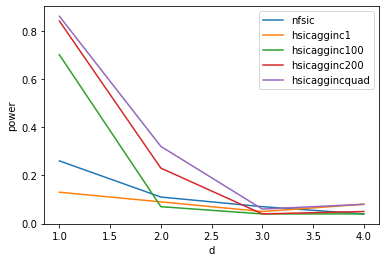

In [147]:
power = np.load("results/hsic_vary_d.npy")
tests_names = tests_names_hsic_vary_d
x_axis = x_axis_hsic_vary_d
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("d") 
    plt.ylabel("power")
print(np.mean(power, -1))

## HSIC vary mult

In [78]:
%%capture 
f_theta_seed = 0
p = 1
s = 1 # useless
d = 2 # dx = dy = 1
N = 1000
rep = 100

tests_hsic_vary_mult = [nfsic, hsicagginc1, hsicagginc100, hsicagginc200, hsicaggincquad]
tests_names_hsic_vary_mult = ["nfsic", "hsicagginc1", "hsicagginc100", "hsicagginc200", "hsicaggincquad"]
tests = tests_hsic_vary_mult

mult_values = [1, 2, 3, 4, 5]
x_axis_hsic_vary_mult = mult_values
outputs_hsic_vary_mult = np.zeros((len(tests), len(mult_values), rep))
rs = np.random.RandomState(0)
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(mult_values)):
        mult = mult_values[r]
        seed += 1
        perturbation_multiplier = np.exp(d) * p ** s / mult
        Z = f_theta_sampler(f_theta_seed, seed, N, p, s, perturbation_multiplier, d)
        X = np.expand_dims(Z[:, 0], 1)
        Y = np.expand_dims(Z[:, 1], 1)
        for j in range(len(tests)):
            test = tests[j]
            outputs_hsic_vary_mult[j][r][i] = test(X, Y, seed)
    print(i + 1, "/", rep, "time:", time.time() - t0)
print(outputs_hsic_vary_mult)
np.save("results/hsic_vary_mult.npy", outputs_hsic_vary_mult)

[[1.   0.67 0.22 0.12 0.11]
 [0.65 0.08 0.13 0.   0.06]
 [1.   0.96 0.56 0.27 0.19]
 [1.   0.98 0.75 0.4  0.24]
 [1.   1.   0.82 0.41 0.28]]


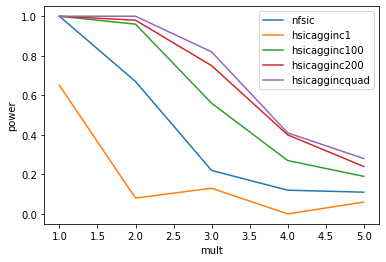

In [148]:
power = np.load("results/hsic_vary_mult.npy")
tests_names = tests_names_hsic_vary_mult
x_axis = x_axis_hsic_vary_mult
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("mult")
    plt.ylabel("power")
print(np.mean(power, -1))

# KSD

We run the LSD experiments separately.

In [26]:
ksdagginc1 = lambda X, p, seed : agginc("ksd", X, p.grad_log(X), alpha=0.05, R=1, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
ksdagginc100 = lambda X, p, seed : agginc("ksd", X, p.grad_log(X), alpha=0.05, R=100, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
ksdagginc200 = lambda X, p, seed : agginc("ksd", X, p.grad_log(X), alpha=0.05, R=200, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
ksdaggincquad = lambda X, p, seed : agginc("ksd", X, p.grad_log(X), alpha=0.05, R=X.shape[0]-1, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)

In [4]:
def generate_rbm(
    seed,
    N,
    sigma,
    dx, # = 50 #50
    dh, # = 40 #40
    burnin_number=2000,
):
    rs = np.random.RandomState(seed)

    # Model p
    B = rs.randint(0, 2, (dx, dh)) * 2 - 1.0
    b = rs.randn(dx)
    c = rs.randn(dh)
    p = kgof_GaussBernRBM(B, b, c)

    # Sample from q
    B_perturbed = B + rs.randn(dx, dh) * sigma
    q = kgof_GaussBernRBM(B_perturbed, b, c)
    ds = q.get_datasource()
    ds.burnin = burnin_number
    samples = ds.sample(N, seed=seed).data()
    
    return samples, p


## KSD vary N

In [101]:
%%capture
sigma = 0.02
dx = 50
dh = 40
rep = 100

tests_ksd_vary_n = [fssd, ksdagginc1, ksdagginc100, ksdagginc200, ksdaggincquad]
tests_names_ksd_vary_n = ["fssd", "ksdagginc1", "ksdagginc100", "ksdagginc200", "ksdaggincquad"]
tests = tests_ksd_vary_n

N_values = [200, 400, 600, 800, 1000]
outputs_ksd_vary_n = np.zeros((len(tests), len(N_values), rep))
rs = np.random.RandomState(0)
x_axis_ksd_vary_n = N_values
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(N_values)):
        N = N_values[r]
        seed += 1
        X, p = generate_rbm(
            seed,
            N,
            sigma,
            dx, 
            dh,
        ) 
        for j in range(len(tests)):
            test = tests[j]
            outputs_ksd_vary_n[j][r][i] = test(X, p, seed)
    print(i + 1, "/", rep, "time:", time.time()-t0)       
np.save("results/ksd_vary_n.npy", outputs_ksd_vary_n)

In [19]:
%%capture
sigma = 0.02
dx = 50
dh = 40
rep = 100

tests_ksd_vary_n = [lsd_test]
tests_names_ksd_vary_n = ["lsd"]
tests = tests_ksd_vary_n

N_values = [200, 400, 600, 800, 1000]
outputs_lsd_vary_n = np.zeros((len(tests), len(N_values), rep))
rs = np.random.RandomState(0)
x_axis_ksd_vary_n = N_values
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(N_values)):
        N = N_values[r]
        seed += 1
        X, p = generate_rbm(
            seed,
            N,
            sigma,
            dx, 
            dh,
        ) 
        p_dist = generate_rbm_p(seed, N, sigma, dx, dh)
        p = p_dist
        for j in range(len(tests)):
            test = tests[j]
            outputs_lsd_vary_n[j][r][i] = test(X, p, seed)
    print(i + 1, "/", rep, "time:", time.time()-t0)       
np.save("results/lsd_vary_n.npy", outputs_lsd_vary_n)

Text(0, 0.5, 'power')

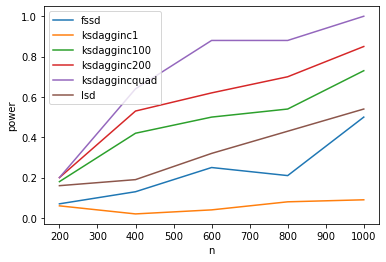

In [20]:
power = np.load("results/ksd_vary_n.npy")
tests_names = ["fssd", "ksdagginc1", "ksdagginc100", "ksdagginc200", "ksdaggincquad"]
x_axis = x_axis_ksd_vary_n
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
power = np.load("results/lsd_vary_n.npy")
plt.plot(x_axis, np.mean(power, -1)[0], label="lsd")
plt.legend()
plt.xlabel("n")
plt.ylabel("power")

## KSD vary d

In [131]:
%%capture 
sigma = 0.03 
N = 1000
rep = 100

dx = 100

tests_ksd_vary_d = [fssd, ksdagginc1, ksdagginc100, ksdagginc200, ksdaggincquad]
tests_names_ksd_vary_d = ["fssd", "ksdagginc1", "ksdagginc100", "ksdagginc200", "ksdaggincquad"]
tests = tests_ksd_vary_d

dx_values = [20, 40, 60, 80]
outputs_ksd_vary_d = np.zeros((len(tests), len(dx_values), rep))
x_axis_ksd_vary_d = dx_values
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(dx_values)):
        dh = dx_values[r]
        seed += 1
        X, p = generate_rbm(
            seed,
            N,
            sigma,
            dx, 
            dh,
        ) 
        for j in range(len(tests)):
            test = tests[j]
            outputs_ksd_vary_d[j][r][i] = test(X, p, seed)
    print(i + 1, "/", rep, "time:", time.time() - t0)       
np.save("results/ksd_vary_d.npy", outputs_ksd_vary_d)

In [18]:
%%capture 
sigma = 0.03 
N = 1000
rep = 100

dx = 100

tests_ksd_vary_d = [lsd_test]
tests_names_ksd_vary_d = ["lsd"]
tests = tests_ksd_vary_d

dx_values = [20, 40, 60, 80]
outputs_lsd_vary_d = np.zeros((len(tests), len(dx_values), rep))
x_axis_ksd_vary_d = dx_values
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(dx_values)):
        dh = dx_values[r]
        seed += 1
        X, p = generate_rbm(
            seed,
            N,
            sigma,
            dx, 
            dh,
        ) 
        p_dist = generate_rbm_p(seed, N, sigma, dx, dh)
        p = p_dist
        for j in range(len(tests)):
            test = tests[j]
            outputs_lsd_vary_d[j][r][i] = test(X, p, seed)
    print(i + 1, "/", rep, "time:", time.time() - t0)       
np.save("results/lsd_vary_d.npy", outputs_lsd_vary_d)


Text(0, 0.5, 'power')

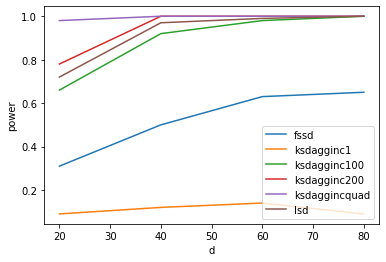

In [21]:
power = np.load("results/ksd_vary_d.npy")
tests_names = ["fssd", "ksdagginc1", "ksdagginc100", "ksdagginc200", "ksdaggincquad"]
x_axis = x_axis_ksd_vary_d
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
power = np.load("results/lsd_vary_d.npy")
plt.plot(x_axis, np.mean(power, -1)[0], label="lsd")
plt.legend()
plt.xlabel("d")
plt.ylabel("power")

## KSD vary sigma

In [122]:
%%capture 
dx = 50
dh = 40
N = 1000
rep = 100

tests_ksd_vary_sigma = [fssd, ksdagginc1, ksdagginc100, ksdagginc200, ksdaggincquad]
tests_names_ksd_vary_sigma = ["fssd", "ksdagginc1", "ksdagginc100", "ksdagginc200", "ksdaggincquad"]
tests = tests_ksd_vary_sigma

sigma_values = [0, 0.01, 0.02, 0.03, 0.04]
outputs_ksd_vary_sigma = np.zeros((len(tests), len(sigma_values), rep))
x_axis_ksd_vary_sigma = sigma_values
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(sigma_values)):
        sigma = sigma_values[r]
        seed += 1
        X, p = generate_rbm(
            seed,
            N,
            sigma,
            dx, 
            dh,
        ) 
        for j in range(len(tests)):
            test = tests[j]
            outputs_ksd_vary_sigma[j][r][i] = test(X, p, seed)
    print(i + 1, "/", rep, "time:", time.time() - t0)       
np.save("results/ksd_vary_sigma.npy", outputs_ksd_vary_sigma)

In [14]:
%%capture 
dx = 50
dh = 40
N = 1000
rep = 100

tests_ksd_vary_sigma = [lsd_test]
tests_names_ksd_vary_sigma = ["lsd"]
tests = tests_ksd_vary_sigma

sigma_values = [0, 0.01, 0.02, 0.03, 0.04]
outputs_lsd_vary_sigma = np.zeros((len(tests), len(sigma_values), rep))
x_axis_ksd_vary_sigma = sigma_values
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(sigma_values)):
        sigma = sigma_values[r]
        seed += 1
        X, p = generate_rbm(
            seed,
            N,
            sigma,
            dx, 
            dh,
        ) 
        p_dist = generate_rbm_p(seed, N, sigma, dx, dh)
        p = p_dist
        for j in range(len(tests)):
            test = tests[j]
            outputs_lsd_vary_sigma[j][r][i] = test(X, p, seed)
    print(i + 1, "/", rep, "time:", time.time() - t0)       
np.save("results/lsd_vary_sigma.npy", outputs_lsd_vary_sigma)

Text(0, 0.5, 'power')

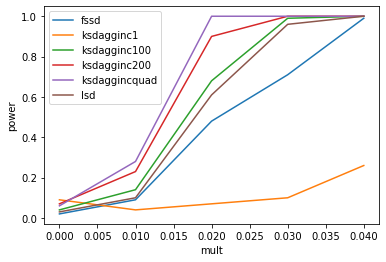

In [16]:
power = np.load("results/ksd_vary_sigma.npy")
tests_names = ["fssd", "ksdagginc1", "ksdagginc100", "ksdagginc200", "ksdaggincquad"]
x_axis = x_axis_ksd_vary_sigma
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
power = np.load("results/lsd_vary_sigma.npy")
plt.plot(x_axis, np.mean(power, -1)[0], label="lsd")
plt.legend()
plt.xlabel("mult")
plt.ylabel("power")

# Time

## MMD vary N Time

In [36]:
%%capture
f_theta_seed = 0
p = 2
s = 1 # useless with our scaling
perturbation_multiplier = 5
d = 1
mult = 2

tests_mmd_vary_n = [met, scf, ost_test, mmdagginc1, mmdagginc100, mmdagginc200, mmdaggincquad]
tests_names_mmd_vary_n = ["met", "scf", "ost_test", "mmdagginc1", "mmdagginc100", "mmdagginc200", "mmdaggincquad"]
tests = tests_mmd_vary_n

N_values = [200, 400, 600, 800, 1000]
time_mmd_vary_n_mean = np.zeros((len(tests), len(N_values)))
time_mmd_vary_n_std = np.zeros((len(tests), len(N_values)))
rs = np.random.RandomState(0)
x_axis_mmd_vary_n = N_values
seed = 0
for r in range(len(N_values)):
    N = N_values[r]
    seed += 1
    perturbation_multiplier = np.exp(d) * p ** s / mult
    X = rs.uniform(0, 1, (N, d)) 
    Y = f_theta_sampler(f_theta_seed, seed, N, p, s, perturbation_multiplier, d)
    for j in range(len(tests)):
        test = tests[j]
        time_f = %timeit -o -r 20 -n 1 test(X, Y, seed)
        time_mmd_vary_n_mean[j][r] = np.mean(time_f.timings)
        time_mmd_vary_n_std[j][r] = np.std(time_f.timings)    
np.save("results/time_mmd_vary_n_mean.npy", time_mmd_vary_n_mean)
np.save("results/time_mmd_vary_n_std.npy", time_mmd_vary_n_std)

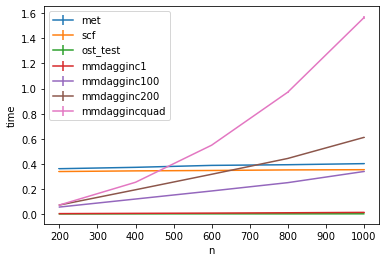

In [4]:
time_mean = np.load("results/time_mmd_vary_n_mean.npy")
time_std = np.load("results/time_mmd_vary_n_std.npy")
tests_names = tests_names_mmd_vary_n
x_axis = x_axis_mmd_vary_n
for j in range(len(tests_names)):
    plt.errorbar(x_axis, time_mean[j], time_std[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("n")
    plt.ylabel("time")

## HSIC vary N Time

In [44]:
%%capture
f_theta_seed = 0
p = 2 
s = 1 # useless with our scaling
d = 2 # dx = 1 and dy = 1
rep = 100
mult = 2 

tests_hsic_vary_n = [nfsic, hsicagginc1, hsicagginc100, hsicagginc200, hsicaggincquad]
tests_names_hsic_vary_n = ["nfsic", "hsicagginc1", "hsicagginc100", "hsicagginc200", "hsicaggincquad"]
tests = tests_hsic_vary_n

N_values = [200, 400, 600, 800, 1000]
time_hsic_vary_n_mean = np.zeros((len(tests), len(N_values)))
time_hsic_vary_n_std = np.zeros((len(tests), len(N_values)))
rs = np.random.RandomState(0)
x_axis_hsic_vary_n = N_values
seed = 0

for r in range(len(N_values)):
    N = N_values[r]
    seed += 1
    perturbation_multiplier = np.exp(d) * p ** s / mult
    Z = f_theta_sampler(f_theta_seed, seed, N, p, s, perturbation_multiplier, d)
    X = np.expand_dims(Z[:, 0], 1)
    Y = np.expand_dims(Z[:, 1], 1)
    for j in range(len(tests)):
        test = tests[j]
        time_f = %timeit -o -r 20 -n 1 test(X, Y, seed)
        time_hsic_vary_n_mean[j][r] = np.mean(time_f.timings)
        time_hsic_vary_n_std[j][r] = np.std(time_f.timings)    
np.save("results/time_hsic_vary_n_mean.npy", time_hsic_vary_n_mean)
np.save("results/time_hsic_vary_n_std.npy", time_hsic_vary_n_std)

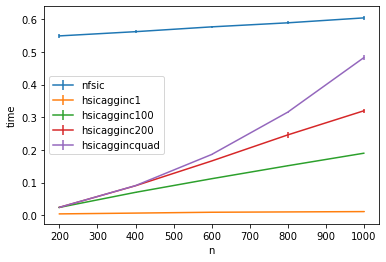

In [45]:
time_mean = np.load("results/time_hsic_vary_n_mean.npy")
time_std = np.load("results/time_hsic_vary_n_std.npy")
tests_names = tests_names_hsic_vary_n
x_axis = x_axis_hsic_vary_n
for j in range(len(tests_names)):
    plt.errorbar(x_axis, time_mean[j], time_std[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("n")
    plt.ylabel("time")

## KSD vary N Time

In [42]:
%%capture
sigma = 0.02
dx = 50
dh = 40
rep = 100

tests_ksd_vary_n = [fssd, lsd_test, ksdagginc1, ksdagginc100, ksdagginc200, ksdaggincquad]
tests_names_ksd_vary_n = ["fssd", "lsd", "ksdagginc1", "ksdagginc100", "ksdagginc200", "ksdaggincquad"]
tests = tests_ksd_vary_n

N_values = [200, 400, 600, 800, 1000]
time_ksd_vary_n_mean = np.zeros((len(tests), len(N_values)))
time_ksd_vary_n_std = np.zeros((len(tests), len(N_values)))
rs = np.random.RandomState(0)
x_axis_ksd_vary_n = N_values
seed = 0

for r in range(len(N_values)):
    N = N_values[r]
    seed += 1
    X, p = generate_rbm(
        seed,
        N,
        sigma,
        dx, 
        dh,
    ) 
    for j in range(len(tests)):
        test = tests[j]
        if test == lsd_test:
            p_dist = generate_rbm_p(seed, N, sigma, dx, dh)
            time_f = %timeit -o -r 20 -n 1 test(X, p_dist, seed)
        else:
            time_f = %timeit -o -r 20 -n 1 test(X, p, seed)
        time_ksd_vary_n_mean[j][r] = np.mean(time_f.timings)
        time_ksd_vary_n_std[j][r] = np.std(time_f.timings)  
        
np.save("results/time_ksd_vary_n_mean.npy", time_ksd_vary_n_mean)
np.save("results/time_ksd_vary_n_std.npy", time_ksd_vary_n_std)

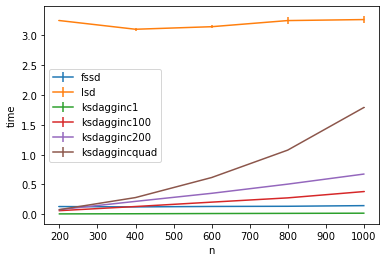

In [43]:
time_mean = np.load("results/time_ksd_vary_n_mean.npy")
time_std = np.load("results/time_ksd_vary_n_std.npy")
tests_names = tests_names_ksd_vary_n
x_axis = x_axis_ksd_vary_n
for j in range(len(tests_names)):
    plt.errorbar(x_axis, time_mean[j], time_std[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("n")
    plt.ylabel("time")

# Plots

In [46]:
from matplotlib import pyplot as plt
from matplotlib import rc, rcParams

In [47]:
fs = 16
rcParams.update({"font.size": fs})
rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
rc("text", usetex=True)

## MMD plot

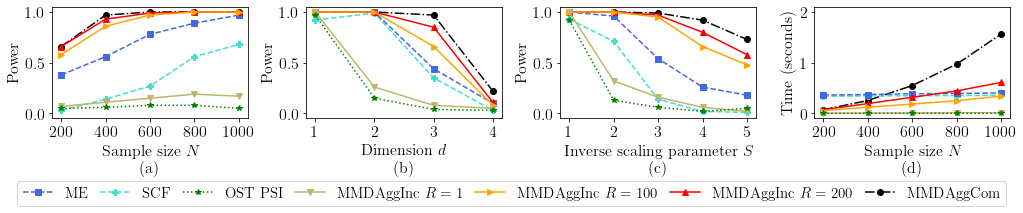

In [151]:
# MMD
scale = 0.8
f, axs = plt.subplots(1, 4, figsize=(18 * scale, 3 * scale))
f.tight_layout()
f.subplots_adjust(wspace=0.3, hspace=1.6)

# Parameters
tests_names = ["ME", "SCF", "OST PSI", r"MMDAggInc $R=1$", r"MMDAggInc $R=100$", r"MMDAggInc $R=200$", r"MMDAggCom"]
styles = ["--", "--", "dotted", "-", "-", "-", "-."]
markers = ["s", "P", "*", "v", ">", "^", "o"]
colors = ["royalblue", "turquoise", "green", "darkkhaki", "orange", "red", "black"]
order = [6, 1, 0, 5, 4, 3, 2]

# Plot 0 MMD vary n
idx = 0
power = np.load("results/mmd_vary_n.npy")
x_axis = [200, 400, 600, 800, 1000]
for j in order:
    axs[idx].plot(x_axis, np.mean(power, -1)[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j])
axs[idx].set_xlabel(r"Sample size $N$" + "\n (a)")
axs[idx].set_ylabel("Power")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])

# Plot 1 MMD vary d
idx = 1
power = np.load("results/mmd_vary_d.npy")
x_axis = [1, 2, 3, 4]
for j in order:
    axs[idx].plot(x_axis, np.mean(power, -1)[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j])
axs[idx].set_xlabel(r"Dimension $d$" + "\n (b)")
axs[idx].set_ylabel("Power")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])

# Plot 2 MMD vary mult
idx = 2
power = np.load("results/mmd_vary_mult.npy")
x_axis = [1, 2, 3, 4, 5]
for j in order:
    axs[idx].plot(x_axis, np.mean(power, -1)[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j])
axs[idx].set_xlabel(r"Inverse scaling parameter $S$" + "\n (c)")
axs[idx].set_ylabel("Power")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])

# Plot 3 MMD vary time
idx = 3
time_mean = np.load("results/time_mmd_vary_n_mean.npy")
time_std = np.load("results/time_mmd_vary_n_std.npy")
x_axis = [200, 400, 600, 800, 1000]
for j in order:
    axs[idx].errorbar(x_axis, time_mean[j], time_std[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j])
axs[idx].set_xlabel(r"Sample size $N$" + "\n (d)")
axs[idx].set_ylabel("Time (seconds)")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.1, 2.1)
axs[idx].set_yticks([0, 1, 2])
handles, labels = axs[idx].get_legend_handles_labels()
handles = [h[0] for h in handles]
order_legend = (2, 1, 6, 5, 4, 3, 0) #(0, 1, 2, 3, 4, 5, 6)
axs[idx].legend(
    (handles[index] for index in order_legend),
    (labels[index] for index in order_legend),
    fontsize=15,
    ncol=7,
    handleheight=0.5,
    labelspacing=0.4,
    columnspacing=0.8,
    loc="lower center",
    bbox_to_anchor=(-1.55, -0.85),
)

# Save MMD Figure
f.savefig("figures/figure_mmd.eps", bbox_inches="tight")
f.savefig("figures/figure_mmd.png", dpi=300, bbox_inches="tight")

## HSIC plot

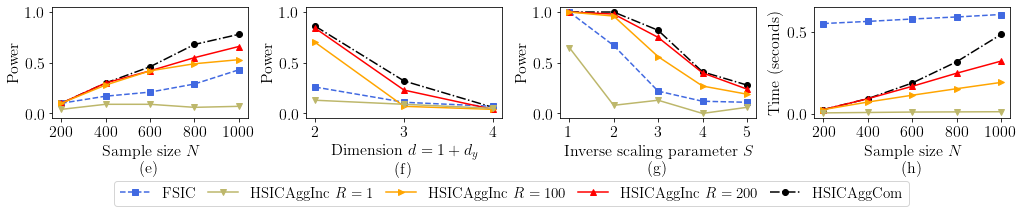

In [162]:
# HSIC
scale = 0.8
f, axs = plt.subplots(1, 4, figsize=(18 * scale, 3 * scale))
f.tight_layout()
f.subplots_adjust(wspace=0.3, hspace=1.6)

# Parameters
tests_names = ["FSIC", r"HSICAggInc $R=1$", r"HSICAggInc $R=100$", r"HSICAggInc $R=200$", r"HSICAggCom"]
styles = ["--", "-", "-", "-", "-."]
markers = ["s", "v", ">", "^", "o"]
colors = ["royalblue", "darkkhaki", "orange", "red", "black"]
order = [4, 0, 3, 2, 1]

# Plot 0 HSIC vary n
idx = 0
power = np.load("results/hsic_vary_n.npy")
x_axis = [200, 400, 600, 800, 1000]
for j in order:
    axs[idx].plot(x_axis, np.mean(power, -1)[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j])
axs[idx].set_xlabel(r"Sample size $N$" + "\n (e)")
axs[idx].set_ylabel("Power")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])

# Plot 1 HSIC vary d
idx = 1
power = np.load("results/hsic_vary_d.npy")
x_axis = [2, 3, 4]
for j in order:
    axs[idx].plot(x_axis, np.mean(power, -1)[j][:3], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j])
axs[idx].set_xlabel(r"Dimension $d = 1+d_y$" + "\n (f)")
axs[idx].set_ylabel("Power")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])

# Plot 2 HSIC vary mult
idx = 2
power = np.load("results/hsic_vary_mult.npy")
x_axis = [1, 2, 3, 4, 5]
for j in order:
    axs[idx].plot(x_axis, np.mean(power, -1)[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j])
axs[idx].set_xlabel(r"Inverse scaling parameter $S$" + "\n (g)")
axs[idx].set_ylabel("Power")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])

# Plot 3 HSIC vary time
idx = 3
time_mean = np.load("results/time_hsic_vary_n_mean.npy")
time_std = np.load("results/time_hsic_vary_n_std.npy")
x_axis = [200, 400, 600, 800, 1000]
for j in order:
    axs[idx].errorbar(x_axis, time_mean[j], time_std[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j])
axs[idx].set_xlabel(r"Sample size $N$" + "\n (h)")
axs[idx].set_ylabel("Time (seconds)")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.03, 0.65)
axs[idx].set_yticks([0, 0.5])
handles, labels = axs[idx].get_legend_handles_labels()
handles = [h[0] for h in handles]
order_legend = (1, 4, 3, 2, 0) #(0, 1, 2, 3, 4, 5, 6)
axs[idx].legend(
    (handles[index] for index in order_legend),
    (labels[index] for index in order_legend),
    fontsize=15,
    ncol=7,
    handleheight=0.5,
    labelspacing=0.4,
    columnspacing=0.8,
    loc="lower center",
    bbox_to_anchor=(-1.55, -0.85),
)

# Save HSIC Figure
f.savefig("figures/figure_hsic.eps", bbox_inches="tight")
f.savefig("figures/figure_hsic.png", dpi=300, bbox_inches="tight")

## KSD plot

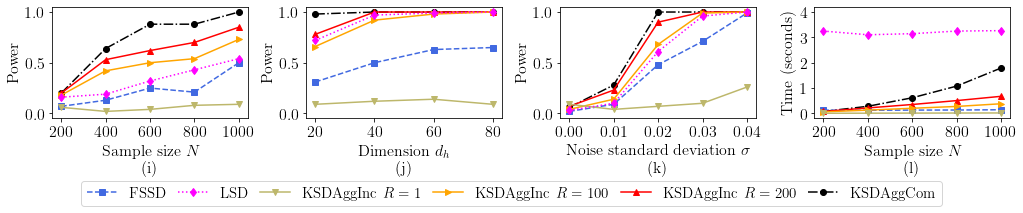

In [161]:
# KSD
scale = 0.8
f, axs = plt.subplots(1, 4, figsize=(18 * scale, 3 * scale))
f.tight_layout()
f.subplots_adjust(wspace=0.3, hspace=1.6)

# Parameters
tests_names = ["FSSD", r"KSDAggInc $R=1$", r"KSDAggInc $R=100$", r"KSDAggInc $R=200$", r"KSDAggCom"]
styles = ["--", "-", "-", "-", "-."]
markers = ["s", "v", ">", "^", "o"]
colors = ["royalblue", "darkkhaki", "orange", "red", "black"]
order = [4, 0, 3, 2, 1]
color_lsd = "fuchsia"
style_lsd = "dotted"
marker_lsd = "d"

# Plot 0 KSD vary n
idx = 0
power = np.load("results/ksd_vary_n.npy")
x_axis = [200, 400, 600, 800, 1000]
for j in order:
    axs[idx].plot(x_axis, np.mean(power, -1)[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j])
power = np.load("results/lsd_vary_n.npy")
axs[idx].plot(x_axis, np.mean(power, -1)[0], color=color_lsd, marker=marker_lsd, linestyle=style_lsd, label="LSD")
axs[idx].set_xlabel(r"Sample size $N$" + "\n (i)")
axs[idx].set_ylabel("Power")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])

# Plot 1 KSD vary d
idx = 1
power = np.load("results/ksd_vary_d.npy")
x_axis = [20, 40, 60, 80]
for j in order:
    axs[idx].plot(x_axis, np.mean(power, -1)[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j])
power = np.load("results/lsd_vary_d.npy")
axs[idx].plot(x_axis, np.mean(power, -1)[0], color=color_lsd, marker=marker_lsd, linestyle=style_lsd, label="LSD")
axs[idx].set_xlabel(r"Dimension $d_h$" + "\n (j)")
axs[idx].set_ylabel("Power")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])

# Plot 2 KSD vary sigma
idx = 2
power = np.load("results/ksd_vary_sigma.npy")
x_axis = [0, 0.01, 0.02, 0.03, 0.04]
for j in order:
    axs[idx].plot(x_axis, np.mean(power, -1)[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j])
power = np.load("results/lsd_vary_sigma.npy")
axs[idx].plot(x_axis, np.mean(power, -1)[0], color=color_lsd, marker=marker_lsd, linestyle=style_lsd, label="LSD")
axs[idx].set_xlabel(r"Noise standard deviation $\sigma$" + "\n (k)")
axs[idx].set_ylabel("Power")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.05, 1.05)
axs[idx].set_yticks([0, 0.5, 1])

# Plot 3 HSIC vary mult
idx = 3
time_mean = np.load("results/time_ksd_vary_n_mean.npy")
time_std = np.load("results/time_ksd_vary_n_std.npy")
lsd_mean = time_mean[1]
lsd_std = time_std[1]
time_mean = np.delete(time_mean, 1, 0)
time_std = np.delete(time_std, 1, 0)
x_axis = [200, 400, 600, 800, 1000]
for j in order:
    axs[idx].errorbar(x_axis, time_mean[j], time_std[j], color=colors[j], marker=markers[j], linestyle=styles[j], label=tests_names[j])
axs[idx].errorbar(x_axis, lsd_mean, lsd_std, color=color_lsd, marker=marker_lsd, linestyle=style_lsd, label="LSD")
axs[idx].set_xlabel(r"Sample size $N$" + "\n (l)")
axs[idx].set_ylabel("Time (seconds)")
axs[idx].set_xticks(x_axis)
axs[idx].set_ylim(-0.2, 4.2)
axs[idx].set_yticks([0, 1, 2, 3, 4])
handles, labels = axs[idx].get_legend_handles_labels()
handles = [h[0] for h in handles]
order_legend = (1, 5, 4, 3, 2, 0) #(0, 1, 2, 3, 4, 5, 6)
axs[idx].legend(
    (handles[index] for index in order_legend),
    (labels[index] for index in order_legend),
    fontsize=15,
    ncol=7,
    handleheight=0.5,
    labelspacing=0.4,
    columnspacing=0.8,
    loc="lower center",
    bbox_to_anchor=(-1.55, -0.85),
)

# Save KSD Figure
f.savefig("figures/figure_ksd.eps", bbox_inches="tight")
f.savefig("figures/figure_ksd.png", dpi=300, bbox_inches="tight")

# Level

## Level MMD vary N

In [7]:
mmdagginc1 = lambda X, Y, seed : agginc("mmd", X, Y, alpha=0.05, R=1, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
mmdagginc100 = lambda X, Y, seed : agginc("mmd", X, Y, alpha=0.05, R=100, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
mmdagginc200 = lambda X, Y, seed : agginc("mmd", X, Y, alpha=0.05, R=200, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
mmdaggincquad = lambda X, Y, seed : agginc("mmd", X, Y, alpha=0.05, R=X.shape[0]-1, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
ost_test = lambda X, Y, seed : ost(seed, X, Y, alpha=0.05, kernel_type="gaussian", l_minus=-3, l_plus=0)

In [38]:
%%capture
f_theta_seed = 0
p = 2
s = 1 # useless with our scaling
perturbation_multiplier = 5
d = 1
rep = 200
mult = 2

tests_mmd_vary_n = [met, scf, ost_test, mmdagginc1, mmdagginc100, mmdagginc200, mmdaggincquad]
tests_names_mmd_vary_n = ["met", "scf", "ost_test", "mmdagginc1", "mmdagginc100", "mmdagginc200", "mmdaggincquad"]
tests = tests_mmd_vary_n

N_values = [200, 400, 600, 800, 1000]
outputs_mmd_vary_n = np.zeros((len(tests), len(N_values), rep))
rs = np.random.RandomState(0)
x_axis_mmd_vary_n = N_values
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(N_values)):
        N = N_values[r]
        seed += 1
        perturbation_multiplier = np.exp(d) * p ** s / mult
        X = rs.uniform(0, 1, (N, d)) 
        Y = rs.uniform(0, 1, (N, d)) 
        for j in range(len(tests)):
            test = tests[j]
            outputs_mmd_vary_n[j][r][i] = test(X, Y, seed)
    print(i + 1, "/", rep, "time:", time.time()-t0)       
np.save("results/level_mmd_vary_n.npy", outputs_mmd_vary_n)

[[0.055 0.005 0.045 0.04  0.05  0.055 0.055]
 [0.08  0.01  0.04  0.035 0.06  0.03  0.03 ]
 [0.08  0.005 0.105 0.085 0.04  0.04  0.07 ]
 [0.05  0.005 0.055 0.075 0.03  0.035 0.055]
 [0.075 0.005 0.045 0.045 0.015 0.02  0.05 ]]


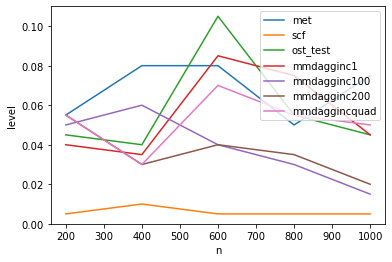

In [5]:
power = np.load("results/level_mmd_vary_n.npy")
tests_names = tests_names_mmd_vary_n
x_axis = x_axis_mmd_vary_n
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("n")
    plt.ylabel("level")
print(np.mean(power, -1).T)

## Level MMD vary d

In [39]:
%%capture 
f_theta_seed = 0
p = 1
s = 1 # useless
rep = 200
N = 1000
mult = 1

tests_mmd_vary_d = [met, scf, ost_test, mmdagginc1, mmdagginc100, mmdagginc200, mmdaggincquad]
tests_names_mmd_vary_d = ["met", "scf", "ost_test", "mmdagginc1", "mmdagginc100", "mmdagginc200", "mmdaggincquad"]
tests = tests_mmd_vary_d

d_values = [1, 2, 3, 4]
x_axis_mmd_vary_d = d_values
outputs_mmd_vary_d = np.zeros((len(tests), len(d_values), rep))
rs = np.random.RandomState(0)
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(d_values)):
        d = d_values[r]
        seed += 1
        perturbation_multiplier = np.exp(d) * p ** s / mult 
        X = rs.uniform(0, 1, (N, d))
        Y = rs.uniform(0, 1, (N, d))
        for j in range(len(tests)):
            test = tests[j]
            outputs_mmd_vary_d[j][r][i] = test(X, Y, seed)
    print(i + 1, "/", rep, "time:", time.time() - t0)     
np.save("results/level_mmd_vary_d.npy", outputs_mmd_vary_d)

[[0.045 0.    0.035 0.02  0.045 0.04  0.045]
 [0.045 0.035 0.085 0.1   0.05  0.04  0.035]
 [0.04  0.05  0.04  0.04  0.05  0.06  0.025]
 [0.045 0.05  0.03  0.055 0.045 0.045 0.03 ]]


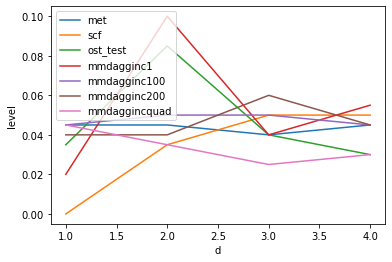

In [51]:
power = np.load("results/level_mmd_vary_d.npy")
tests_names = tests_names_mmd_vary_d
x_axis = x_axis_mmd_vary_d
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("d")
    plt.ylabel("level")
print(np.mean(power, -1).T)

## Level HSIC vary n

In [10]:
hsicagginc1 = lambda X, Y, seed : agginc("hsic", X, Y, alpha=0.05, R=1, l_minus=-2, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
hsicagginc100 = lambda X, Y, seed : agginc("hsic", X, Y, alpha=0.05, R=100, l_minus=-2, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
hsicagginc200 = lambda X, Y, seed : agginc("hsic", X, Y, alpha=0.05, R=200, l_minus=-2, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
hsicaggincquad = lambda X, Y, seed : agginc("hsic", X, Y, alpha=0.05, R=X.shape[0]-1, l_minus=-2, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)

In [40]:
%%capture
f_theta_seed = 0
p = 2 
s = 1 # useless with our scaling
d = 2 # dx = 1 and dy = 1
rep = 200
mult = 2 

tests_hsic_vary_n = [nfsic, hsicagginc1, hsicagginc100, hsicagginc200, hsicaggincquad]
tests_names_hsic_vary_n = ["nfsic", "hsicagginc1", "hsicagginc100", "hsicagginc200", "hsicaggincquad"]
tests = tests_hsic_vary_n

N_values = [200, 400, 600, 800, 1000]
outputs_hsic_vary_n = np.zeros((len(tests), len(N_values), rep))
rs = np.random.RandomState(0)
x_axis_hsic_vary_n = N_values
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(N_values)):
        N = N_values[r]
        seed += 1
        perturbation_multiplier = np.exp(d) * p ** s / mult
        #Z = f_theta_sampler(f_theta_seed, seed, N, p, s, perturbation_multiplier, d)
        #X = np.expand_dims(Z[:, 0], 1)
        #Y = np.expand_dims(Z[:, 1], 1)
        X = rs.uniform(0, 1, (N, 1))
        Y = rs.uniform(0, 1, (N, 1))
        for j in range(len(tests)):
            test = tests[j]
            outputs_hsic_vary_n[j][r][i] = test(X, Y, seed)
    print(i + 1, "/", rep, "time:", time.time()-t0)       
np.save("results/level_hsic_vary_n.npy", outputs_hsic_vary_n)

[[0.04  0.055 0.035 0.035 0.035]
 [0.045 0.05  0.04  0.05  0.05 ]
 [0.05  0.035 0.05  0.06  0.05 ]
 [0.03  0.07  0.02  0.035 0.04 ]
 [0.07  0.02  0.085 0.035 0.04 ]]


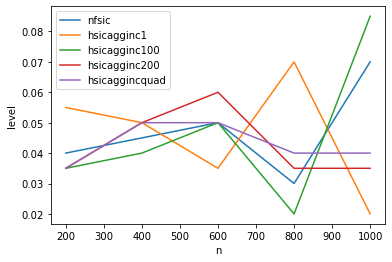

In [52]:
power = np.load("results/level_hsic_vary_n.npy")
tests_names = tests_names_hsic_vary_n
x_axis = x_axis_hsic_vary_n
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("n")
    plt.ylabel("level")
print(np.mean(power, -1).T) 

## Level HSIC vary d

In [41]:
%%capture 
f_theta_seed = 0
p = 1
s = 1 # useless
rep = 200
N = 1000
mult = 1

tests_hsic_vary_d = [nfsic, hsicagginc1, hsicagginc100, hsicagginc200, hsicaggincquad]
tests_names_hsic_vary_d = ["nfsic", "hsicagginc1", "hsicagginc100", "hsicagginc200", "hsicaggincquad"]
tests = tests_hsic_vary_d

d_values = [1, 2, 3, 4] # this is dx = 1 and dy = 1, 2, 3, 4
x_axis_hsic_vary_d = d_values
outputs_hsic_vary_d = np.zeros((len(tests), len(d_values), rep))
rs = np.random.RandomState(0)
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(d_values)):
        d = d_values[r]
        seed += 1
        perturbation_multiplier = np.exp(d) * p ** s / mult 
        X = rs.uniform(0, 1, (N, 1))
        Y = rs.uniform(0, 1, (N, d))
        for j in range(len(tests)):
            test = tests[j]
            outputs_hsic_vary_d[j][r][i] = test(X, Y, seed)
    print(i + 1, "/", rep, "time:", time.time() - t0)     
np.save("results/level_hsic_vary_d.npy", outputs_hsic_vary_d)

[[0.035 0.065 0.08  0.055 0.07 ]
 [0.065 0.055 0.035 0.02  0.025]
 [0.04  0.035 0.045 0.055 0.055]
 [0.055 0.07  0.03  0.025 0.02 ]]


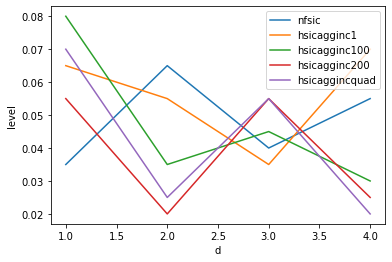

In [53]:
power = np.load("results/level_hsic_vary_d.npy")
tests_names = tests_names_hsic_vary_d
x_axis = x_axis_hsic_vary_d
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("d") 
    plt.ylabel("level")
print(np.mean(power, -1).T)

## Level KSD vary n

In [13]:
ksdagginc1 = lambda X, p, seed : agginc("ksd", X, p.grad_log(X), alpha=0.05, R=1, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
ksdagginc100 = lambda X, p, seed : agginc("ksd", X, p.grad_log(X), alpha=0.05, R=100, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
ksdagginc200 = lambda X, p, seed : agginc("ksd", X, p.grad_log(X), alpha=0.05, R=200, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)
ksdaggincquad = lambda X, p, seed : agginc("ksd", X, p.grad_log(X), alpha=0.05, R=X.shape[0]-1, l_minus=-3, l_plus=0, B1=500, B2=500, B3=50, weights_type="uniform", seed=seed)

In [14]:
def generate_rbm(
    seed,
    N,
    sigma,
    dx, # = 50 #50
    dh, # = 40 #40
    burnin_number=2000,
):
    rs = np.random.RandomState(seed)

    # Model p
    B = rs.randint(0, 2, (dx, dh)) * 2 - 1.0
    b = rs.randn(dx)
    c = rs.randn(dh)
    p = kgof_GaussBernRBM(B, b, c)

    # Sample from q
    B_perturbed = B + rs.randn(dx, dh) * sigma
    q = kgof_GaussBernRBM(B_perturbed, b, c)
    ds = q.get_datasource()
    ds.burnin = burnin_number
    samples = ds.sample(N, seed=seed).data()
    
    return samples, p


In [42]:
%%capture
sigma = 0 # level
dx = 50
dh = 40
rep = 200

tests_ksd_vary_n = [fssd, ksdagginc1, ksdagginc100, ksdagginc200, ksdaggincquad, lsd_test]
tests_names_ksd_vary_n = ["fssd", "ksdagginc1", "ksdagginc100", "ksdagginc200", "ksdaggincquad", "lsd"]
tests = tests_ksd_vary_n

N_values = [200, 400, 600, 800, 1000]
outputs_ksd_vary_n = np.zeros((len(tests), len(N_values), rep))
rs = np.random.RandomState(0)
x_axis_ksd_vary_n = N_values
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(N_values)):
        N = N_values[r]
        seed += 1
        X, p = generate_rbm(
            seed,
            N,
            sigma,
            dx, 
            dh,
        ) 
        for j in range(len(tests)):
            test = tests[j]
            if test == lsd_test: 
                p_dist = generate_rbm_p(seed, N, sigma, dx, dh)
                outputs_ksd_vary_n[j][r][i] = test(X, p_dist, seed)
            else:
                outputs_ksd_vary_n[j][r][i] = test(X, p, seed)
    print(i + 1, "/", rep, "time:", time.time()-t0)       
np.save("results/level_ksd_vary_n.npy", outputs_ksd_vary_n)

[[0.02  0.05  0.045 0.06  0.06  0.07 ]
 [0.03  0.06  0.04  0.065 0.055 0.04 ]
 [0.04  0.03  0.03  0.04  0.07  0.075]
 [0.03  0.055 0.06  0.045 0.07  0.06 ]
 [0.025 0.045 0.035 0.045 0.065 0.05 ]]


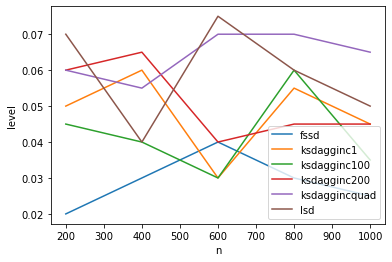

In [54]:
power = np.load("results/level_ksd_vary_n.npy")
tests_names = tests_names_ksd_vary_n
x_axis = x_axis_ksd_vary_n
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("n")
    plt.ylabel("level")
print(np.mean(power, -1).T) 

## Level KSD vary d

In [43]:
%%capture 
sigma = 0 # level
N = 1000
rep = 200

dx = 100

tests_ksd_vary_d = [fssd, ksdagginc1, ksdagginc100, ksdagginc200, ksdaggincquad, lsd_test]
tests_names_ksd_vary_d = ["fssd", "ksdagginc1", "ksdagginc100", "ksdagginc200", "ksdaggincquad", "lsd"]
tests = tests_ksd_vary_d

dx_values = [20, 40, 60, 80]
outputs_ksd_vary_d = np.zeros((len(tests), len(dx_values), rep))
x_axis_ksd_vary_d = dx_values
seed = 0
for i in range(rep):
    t0 = time.time()
    for r in range(len(dx_values)):
        dh = dx_values[r]
        seed += 1
        X, p = generate_rbm(
            seed,
            N,
            sigma,
            dx, 
            dh,
        ) 
        for j in range(len(tests)):
            test = tests[j]
            if test == lsd_test: 
                p_dist = generate_rbm_p(seed, N, sigma, dx, dh)
                outputs_ksd_vary_d[j][r][i] = test(X, p_dist, seed)
            else:
                outputs_ksd_vary_d[j][r][i] = test(X, p, seed)
    print(i + 1, "/", rep, "time:", time.time() - t0)       
np.save("results/level_ksd_vary_d.npy", outputs_ksd_vary_d)

[[0.02  0.045 0.06  0.065 0.05  0.055]
 [0.04  0.07  0.055 0.065 0.07  0.055]
 [0.04  0.06  0.04  0.05  0.06  0.055]
 [0.015 0.045 0.04  0.035 0.05  0.04 ]]


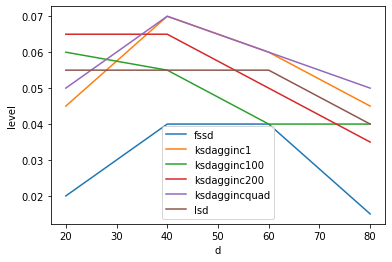

In [55]:
power = np.load("results/level_ksd_vary_d.npy")
tests_names = tests_names_ksd_vary_d
x_axis = x_axis_ksd_vary_d
for j in range(len(tests_names)):
    plt.plot(x_axis, np.mean(power, -1)[j], label=tests_names[j])
    plt.legend()
    plt.xlabel("d")
    plt.ylabel("level")
print(np.mean(power, -1).T)